## MODEL PERFORMANCE ANALYSIS AND STATISTICAL ANALYSIS

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import nibabel as nib

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend as K
from keras.models import Model, load_model

from keras.optimizers import Adam

avg_sens = [0,0,0,0]
avg_spec = [0,0,0,0]
def standardize(image):

  standardized_image = np.zeros(image.shape)

  for z in range(image.shape[2]):
    
      image_slice = image[:,:,z]

      centered = image_slice - np.mean(image_slice)

      if(np.std(centered)!=0):
          centered = centered/np.std(centered)


      standardized_image[:, :, z] = centered


  return standardized_image


def dice_coef(y_true, y_pred, epsilon=0.00001):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf

    """
    axis = (0,1,2,3)
    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true*y_true, axis=axis) + K.sum(y_pred*y_pred, axis=axis) + epsilon
    return K.mean((dice_numerator)/(dice_denominator))

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

def compute_class_sens_spec(pred, label, class_num):
    """
    Compute sensitivity and specificity for a particular example
    for a given class.
    Args:
        pred (np.array): binary arrary of predictions, shape is
                         (num classes, height, width, depth).
        label (np.array): binary array of labels, shape is
                          (num classes, height, width, depth).
        class_num (int): number between 0 - (num_classes -1) which says
                         which prediction class to compute statistics
                         for.
    Returns:
        sensitivity (float): precision for given class_num.
        specificity (float): recall for given class_num
    """

    class_pred = pred[0,:,:,:,class_num]
    class_label = label[0,:,:,:,class_num]


    tp = np.sum((class_pred == 1) & (class_label == 1))
    tn = np.sum((class_pred == 0) & (class_label == 0))
    fp = np.sum((class_pred == 1) & (class_label == 0))
    fn = np.sum((class_pred == 0) & (class_label == 1))

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)


    return sensitivity, specificity


def get_sens_spec_df(pred, label):
    patch_metrics = pd.DataFrame(
        columns = ['Nothing',
                    'Edema',
                   'Non-Enhancing Tumor',
                   'Enhancing Tumor'],
        index = ['Sensitivity',
                 'Specificity'])

    for i, class_name in enumerate(patch_metrics.columns):
        sens, spec = compute_class_sens_spec(pred, label, i)
        avg_sens[i] += sens
        avg_spec[i] += spec
        patch_metrics.loc['Sensitivity', class_name] = round(sens,4)
        patch_metrics.loc['Specificity', class_name] = round(spec,4)



import os
model = load_model('/content/3d_model (1).h5',custom_objects = {'dice_coef_loss' : dice_coef_loss , 'dice_coef' : dice_coef})


In [ ]:
patient_results = {
    'patient_id': [],
    'dice_coef': [],
    'loss': [],
    'class0_vol': [],
    'class1_vol': [],
    'class2_vol': [],
    'class3_vol': [],
    'class0_sens': [],
    'class0_spec': [],
    'class1_sens': [],
    'class1_spec': [],
    'class2_sens': [],
    'class2_spec': [],
    'class3_sens': [],
    'class3_spec': []
}

class_names = ['Nothing', 'Edema', 'Non-Enhancing Tumor', 'Enhancing Tumor']

In [ ]:
path = '/content/Brats17TrainingData/HGG'
all_images = os.listdir(path)
all_images.sort()
data = np.zeros((240,240,155,4))
image_data2=np.zeros((240,240,155))

Entering Image 90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - dice_coef: 0.5772 - loss: 0.4228
Entering Image 91
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - dice_coef: 0.7656 - loss: 0.2344
Entering Image 92
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - dice_coef: 0.8152 - loss: 0.1848
Entering Image 93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - dice_coef: 0.4763 - loss: 0.5237
Entering Image 94
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - dice_coef: 0.7438 - loss: 0.2562
Entering Image 95
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - dice_coef: 0.7217 - loss: 0.2783
Entering Image 96
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - dice_coef: 0.7567 - loss: 0.2433
Entering Image 97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2

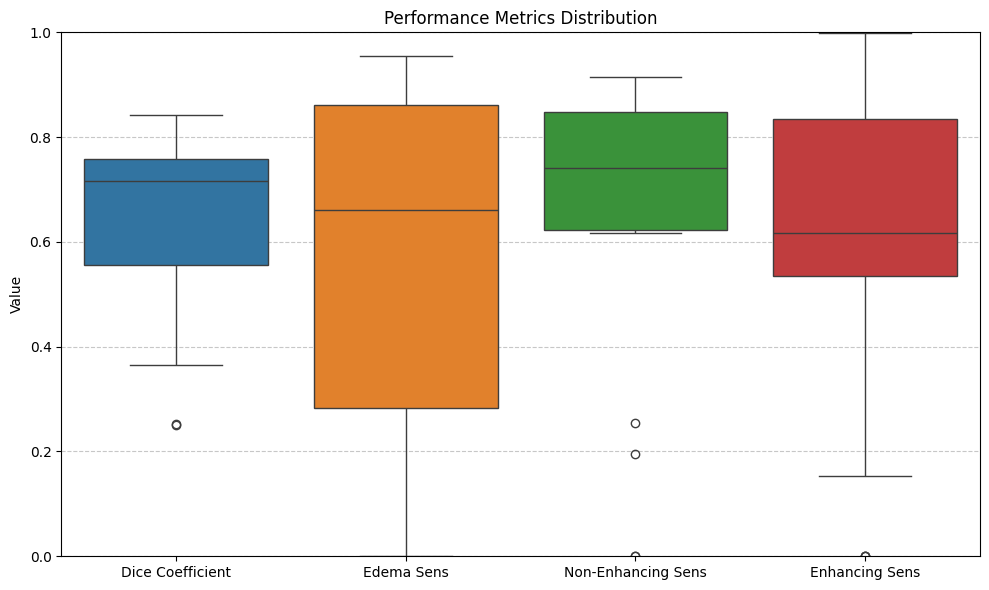

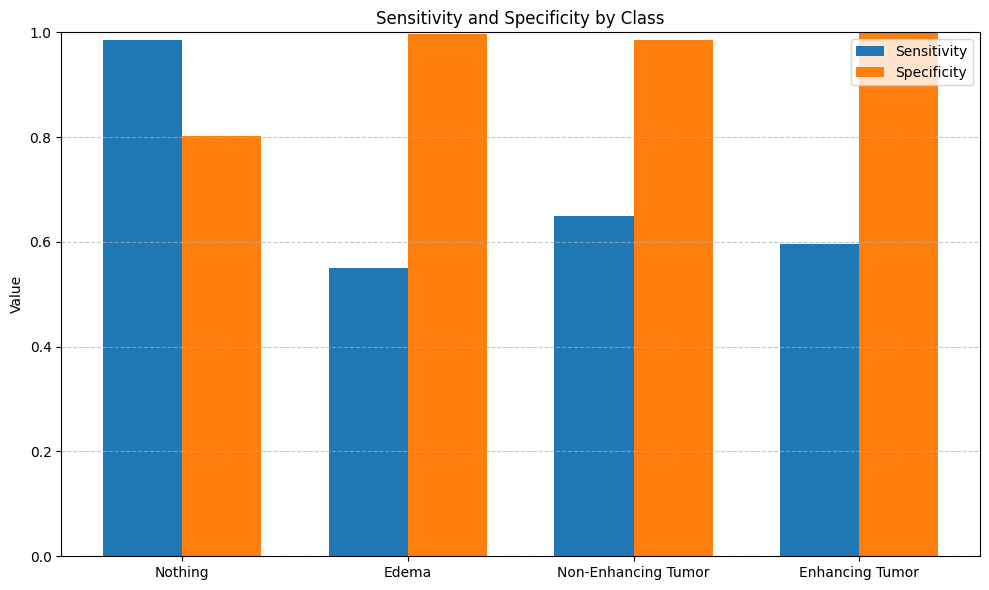

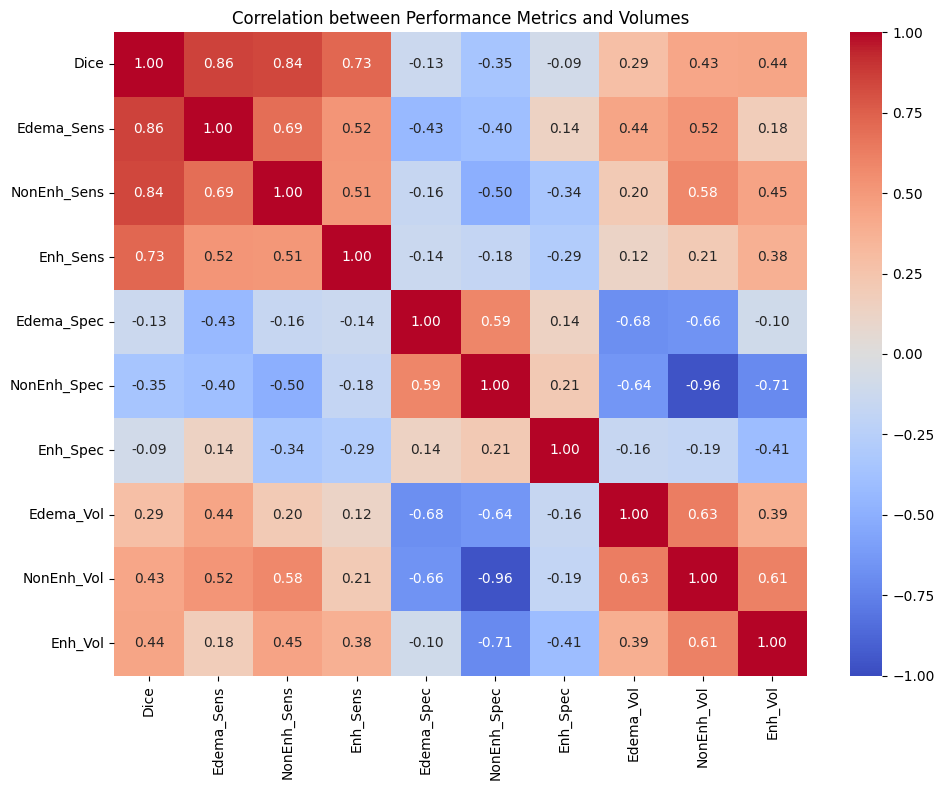

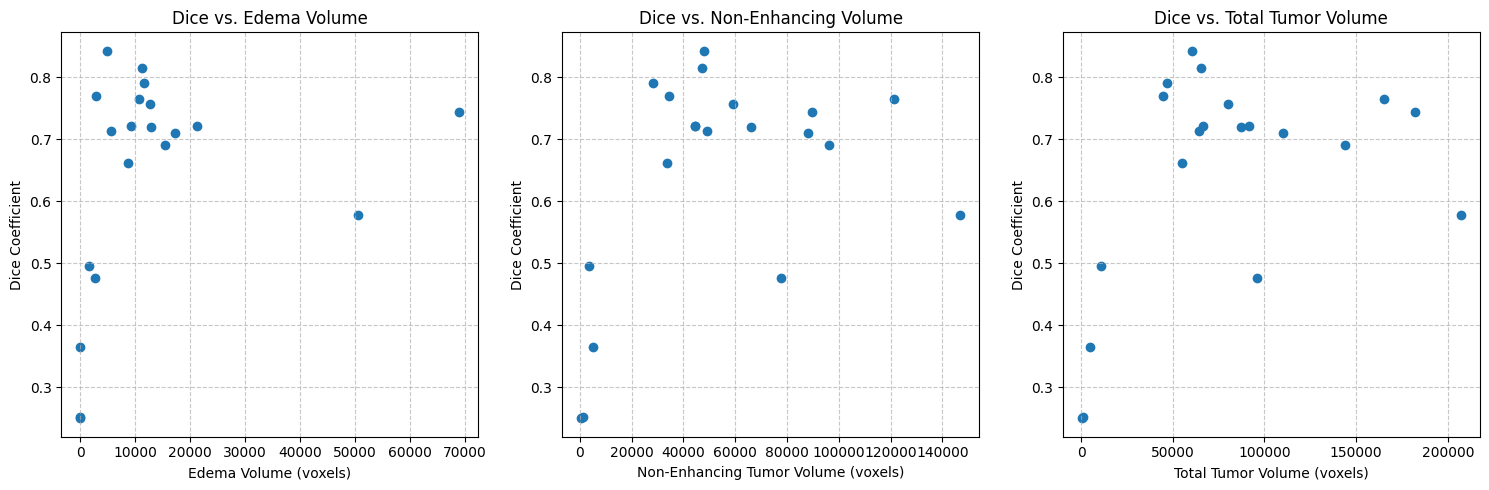

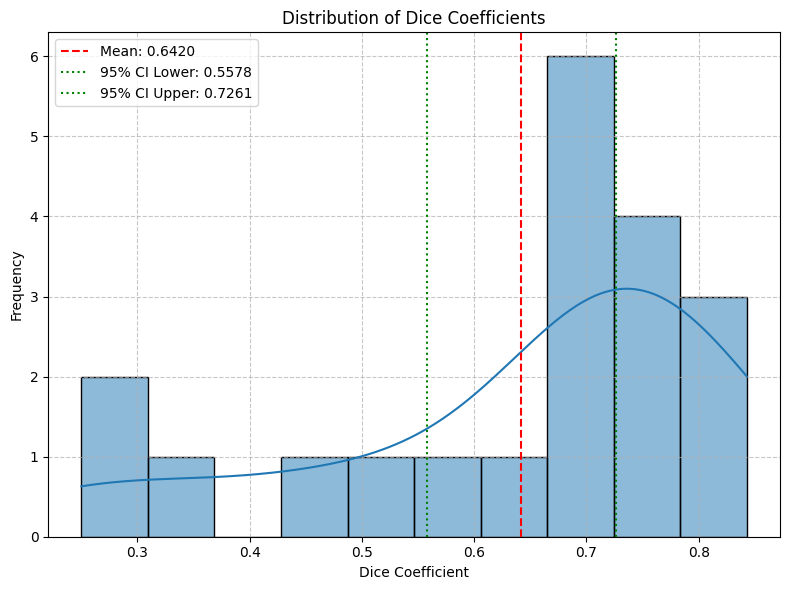

In [ ]:

avg_sens = [0, 0, 0, 0]
avg_spec = [0, 0, 0, 0]
loss_list = []
accu_list = []
mean_loss = 0
mean_accu = 0

all_dice_scores = []
all_sensitivities = [[], [], [], []]
all_specificities = [[], [], [], []]
all_volumes = [[], [], [], []]

import nibabel as nib
for image_num in range(90,110):
    
    print("Entering Image" , image_num)

    x = all_images[image_num]
    
    folder_path = path + '/' + x;
    modalities = [f for f in sorted(os.listdir(folder_path)) if is_nii_file(f)]

    w = 0
    for j in range(len(modalities)-1):
      

      image_path = folder_path + '/' + modalities[j]
      if not(image_path.find('seg.nii') == -1):
        img = nib.load(image_path);
        image_data2 = img.get_fdata()
        image_data2 = np.asarray(image_data2)
        
      else:
        img = nib.load(image_path);
        image_data = img.get_fdata()
        image_data = np.asarray(image_data)
        image_data = standardize(image_data)
        data[:,:,:,w] = image_data
        
        w = w+1

    reshaped_data=data[56:184,75:203,13:141,:]
    reshaped_data=reshaped_data.reshape(1,128,128,128,4)
    reshaped_image_data2=image_data2[56:184,75:203,13:141]


    reshaped_image_data2=reshaped_image_data2.reshape(1,128,128,128)
    reshaped_image_data2[reshaped_image_data2==4] = 3


    reshaped_image_data2 = keras.utils.to_categorical(reshaped_image_data2, num_classes = 4)
    Y_hat = model.predict(x=reshaped_data)
    Y_hat_classes = np.argmax(Y_hat, axis=-1)
    for i in range(4):
        class_volume = np.sum(Y_hat_classes == i)
        all_volumes[i].append(class_volume)

    Y_hat_onehot = keras.utils.to_categorical(Y_hat_classes, num_classes=4)
    for i in range(4):
        sens, spec = compute_class_sens_spec(Y_hat_onehot, reshaped_image_data2, i)
        avg_sens[i] += sens
        avg_spec[i] += spec
        
        all_sensitivities[i].append(sens)
        all_specificities[i].append(spec)

    
    scores = model.evaluate(x=reshaped_data, y=reshaped_image_data2)
    loss_list.append(scores[0])
    accu_list.append(scores[1])
    all_dice_scores.append(scores[1])  # Store individual dice scores
    mean_loss += scores[0]
    mean_accu += scores[1]



num_images = len(loss_list) 


print()
print("Mean Dice Loss", mean_loss/num_images)
print("Mean Dice Coefficient(Accuracy)", mean_accu/num_images)
print()
print("Mean Sensitivity for class 0", avg_sens[0]/num_images)
print("Mean Specificity for class 0", avg_spec[0]/num_images)
print()
print("Mean Sensitivity for class 1", avg_sens[1]/num_images)
print("Mean Specificity for class 1", avg_spec[1]/num_images)
print()
print("Mean Sensitivity for class 2", avg_sens[2]/num_images)
print("Mean Specificity for class 2", avg_spec[2]/num_images)
print()
print("Mean Sensitivity for class 3", avg_sens[3]/num_images)
print("Mean Specificity for class 3", avg_spec[3]/num_images)


print("\n===== STATISTICAL ANALYSIS =====")

# 1. Descriptive statistics with confidence intervals
print("\nDescriptive Statistics with 95% Confidence Intervals:")
class_names = ['Nothing', 'Edema', 'Non-Enhancing Tumor', 'Enhancing Tumor']

# Dice coefficient statistics
dice_mean = np.mean(all_dice_scores)
dice_std = np.std(all_dice_scores)
dice_se = stats.sem(all_dice_scores)
dice_ci = stats.t.interval(0.95, len(all_dice_scores)-1, loc=dice_mean, scale=dice_se)
print(f"Dice Coefficient: {dice_mean:.4f} ± {dice_std:.4f} (95% CI: {dice_ci[0]:.4f} to {dice_ci[1]:.4f})")

# Class-wise statistics
for i in range(4):
    sens_mean = np.mean(all_sensitivities[i])
    sens_std = np.std(all_sensitivities[i])
    sens_se = stats.sem(all_sensitivities[i])
    sens_ci = stats.t.interval(0.95, len(all_sensitivities[i])-1, loc=sens_mean, scale=sens_se)

    spec_mean = np.mean(all_specificities[i])
    spec_std = np.std(all_specificities[i])
    spec_se = stats.sem(all_specificities[i])
    spec_ci = stats.t.interval(0.95, len(all_specificities[i])-1, loc=spec_mean, scale=spec_se)

    vol_mean = np.mean(all_volumes[i])
    vol_std = np.std(all_volumes[i])

    print(f"\n{class_names[i]}:")
    print(f"  Sensitivity: {sens_mean:.4f} ± {sens_std:.4f} (95% CI: {sens_ci[0]:.4f} to {sens_ci[1]:.4f})")
    print(f"  Specificity: {spec_mean:.4f} ± {spec_std:.4f} (95% CI: {spec_ci[0]:.4f} to {spec_ci[1]:.4f})")
    print(f"  Average Volume: {vol_mean:.1f} ± {vol_std:.1f} voxels")

# 2. Hypothesis testing - comparing sensitivity across tumor classes
print("\nHypothesis Testing - Sensitivity Across Tumor Classes:")
# Skip 'Nothing' class (index 0)
f_stat, p_val = stats.f_oneway(all_sensitivities[1], all_sensitivities[2], all_sensitivities[3])
print(f"ANOVA: F={f_stat:.4f}, p-value={p_val:.4f}")
if p_val < 0.05:
    print("Significant difference found in sensitivity between tumor classes (p<0.05)")
    
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    sens_data = np.concatenate([all_sensitivities[1], all_sensitivities[2], all_sensitivities[3]])
    groups = np.concatenate([
        np.repeat('Edema', len(all_sensitivities[1])),
        np.repeat('Non-Enhancing', len(all_sensitivities[2])),
        np.repeat('Enhancing', len(all_sensitivities[3]))
    ])
    tukey = pairwise_tukeyhsd(sens_data, groups, 0.05)
    print("\nTukey's HSD Post-hoc Test:")
    print(tukey)
else:
    print("No significant difference in sensitivity between tumor classes (p>=0.05)")

# 3. Create visualizations

# a. Performance metrics boxplot
plt.figure(figsize=(10, 6))

metrics_df = pd.DataFrame({
    'Dice Coefficient': all_dice_scores,
    'Edema Sens': all_sensitivities[1],
    'Non-Enhancing Sens': all_sensitivities[2],
    'Enhancing Sens': all_sensitivities[3]
})
sns.boxplot(data=metrics_df)
plt.title('Performance Metrics Distribution')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# b. Bar plot of mean sensitivity and specificity by class
plt.figure(figsize=(10, 6))
x = np.arange(len(class_names))
width = 0.35
sensitivities = [np.mean(all_sensitivities[i]) for i in range(4)]
specificities = [np.mean(all_specificities[i]) for i in range(4)]

plt.bar(x - width/2, sensitivities, width, label='Sensitivity')
plt.bar(x + width/2, specificities, width, label='Specificity')
plt.ylabel('Value')
plt.title('Sensitivity and Specificity by Class')
plt.xticks(x, class_names)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# c. Correlation heatmap
plt.figure(figsize=(10, 8))

corr_data = {
    'Dice': all_dice_scores,
    'Edema_Sens': all_sensitivities[1],
    'NonEnh_Sens': all_sensitivities[2],
    'Enh_Sens': all_sensitivities[3],
    'Edema_Spec': all_specificities[1],
    'NonEnh_Spec': all_specificities[2],
    'Enh_Spec': all_specificities[3],
    'Edema_Vol': all_volumes[1],
    'NonEnh_Vol': all_volumes[2],
    'Enh_Vol': all_volumes[3]
}
corr_df = pd.DataFrame(corr_data)
corr_matrix = corr_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation between Performance Metrics and Volumes')
plt.tight_layout()
plt.show()

# d. Dice coefficient vs. volumes scatter plots
plt.figure(figsize=(15, 5))

# Calculate total tumor volume
total_tumor_volumes = np.array(all_volumes[1]) + np.array(all_volumes[2]) + np.array(all_volumes[3])

# Plot three subplots
plt.subplot(1, 3, 1)
plt.scatter(all_volumes[1], all_dice_scores)
plt.xlabel('Edema Volume (voxels)')
plt.ylabel('Dice Coefficient')
plt.title('Dice vs. Edema Volume')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 3, 2)
plt.scatter(all_volumes[2], all_dice_scores)
plt.xlabel('Non-Enhancing Tumor Volume (voxels)')
plt.ylabel('Dice Coefficient')
plt.title('Dice vs. Non-Enhancing Volume')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 3, 3)
plt.scatter(total_tumor_volumes, all_dice_scores)
plt.xlabel('Total Tumor Volume (voxels)')
plt.ylabel('Dice Coefficient')
plt.title('Dice vs. Total Tumor Volume')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# e. Distribution of dice coefficients with KDE
plt.figure(figsize=(8, 6))
sns.histplot(all_dice_scores, kde=True, bins=10)
plt.axvline(x=dice_mean, color='red', linestyle='--', label=f'Mean: {dice_mean:.4f}')
plt.axvline(x=dice_ci[0], color='green', linestyle=':', label=f'95% CI Lower: {dice_ci[0]:.4f}')
plt.axvline(x=dice_ci[1], color='green', linestyle=':', label=f'95% CI Upper: {dice_ci[1]:.4f}')
plt.xlabel('Dice Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Dice Coefficients')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()